In [1]:
from IPython.display import Image
import sys
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import seaborn as sns
print(sys.version)

3.6.2 |Anaconda, Inc.| (default, Sep 30 2017, 18:42:57) 
[GCC 7.2.0]


# Introduction

Dans le domaine IT les applications et programmes génèrent plusieurs données. Ces données sont très volumineuses 
et donc manuellement inexploitables. Or elles peuvent contenir des informations très importantes permettant par 
exemple de détecter l’origine d’un problème dans un système informatique. Les logs sont très riche d’information
et sont généralement composé de :
- $\textbf{Timestamp}$ : Permet d’avoir le temps exact de l’action décrite par le log
- $\textbf{Data}$ : informations fonctionnelles et technique permettant de décrire une action

Ces données sont non structurées et contienne plusieurs informations qui peuvent ne pas vraiment servir. Il est nécessaire donc de diviser l’étude de détection d’anomalies sur les données de logs en plusieurs étapes :
- Extraction des données, des différentes bases existantes permettant d’avoir un data Set le plus complet que possible
- Structuration des données : en utilisant un log analyser (logstash dans ce rapport)
- Centralisation des données : en utilisant elasticsearch
- Visualisation des données : en utilisant kibana pour comprendre les données et aider à voir les anomalies
- Apprentissage sur les données : en utilisant python par exemple. On divise l’étude en 3 étapes qui interagissent entre elles:
     - data cleaning
     - Pre-processing
     - prédiction
Le shéma suivant permet de décrire les différentes étapes décrite ci dessu :

| ![architecture global du system](arch1.png) |
|:--:| 
|  **Figure 1: architecture global du system** |


Dans la section suivante on va détailler le system ELK permettant de préparer les données pour l’étude de détection d’anomalie.

# Traitement des données via ELK:

ELK est une pile qui se Forme autour de la base de donnée Elasticsearch permettant de récupérer  les données de différentes bases de les centraliser et de les visualiser.

Elasticsearch est une base de données orientée documents, considéré comme un moteur de recherche de texte intégral qui permet de trouver les documents les plus pertinents à l’aide de différentes possibilités d’indexation et de mapping complètement paramétrables. Certes, il optimise la recherche à l’aide de ces indexes mais aussi à l’aide d’une architecture interne distribuée interne avec ses clusters.

Elasticsearch est conçu pour être toujours disponible et évolutif pour une meilleure adaptation aux besoins. L'évolution peut provenir de l'achat de grands serveurs (échelle verticale) ou de l'achat de plus de serveurs (échelle horizontale). Alors qu’Elasticsearch peut bénéficier d'un matériel plus puissant, l'évolution verticale a ses limites. L'évolutivité réelle vient de l'échelle horizontale : la possibilité d'ajouter plus de nœuds au cluster et de répartir la charge et la fiabilité entre eux. Dans la plupart des bases de données, la mise à l'échelle horizontale nécessite habituellement une révision majeure de l’application pour profiter des boîtes supplémentaires. En revanche, Elasticsearch est distribué par nature : il sait gérer plusieurs nœuds pour fournir une évolution et une grande disponibilité. Ce qui signifie, également, que l’application en question n'a pas besoin de s'en préoccuper.

La pile ELK $\textbf{(Elasticsearch, Logstash, Kibana)}$ représenter ci dessou permet de faire usage de la base Elasticsearch pour la centralisation et la visualisation des données.

| ![architecture global du system](ELK.png) |
|:--:| 
|  **Figure 2: pile ELK** |


$\textbf{Logstash}$ : Logstash est un outil open source performant qui permet la collecte d’un grand flux de données en temps réel à partir d’une multitude de sources. C’est un pipeline qui permet de formater, nettoyer, transformer, indexer et analyser ces données afin de l’envoyer à la destination centralisée souhaitée. Bien qu’il soit initialement destiné pour l’analyse des fichiers de logs, ses capacités s’étendent au-delà de ce cas d’utilisation. Tout type d’événement ou d’observation de différentes sources peut être transformé et centralisé vu la variété de plugin qu’il dispose comme jdbc, nosql, fichiers, flux http, streams twitter, csv, syslog.. Ensuite, il analyse les données et les traite avec ses différents filtres afin de les restituer dans un format attendu par le consommateur qui les traitera. Ce dernier aura ainsi plusieurs possibilités de plugins de sortie comme elasticsearch, jira, websocket, cvs, nosql .. 

$\textbf{Elasticsearch}$ : Elasticsearch est un puissant moteur de recherche et d’analyse de texte hautement évolutif. Il permet de stocker, chercher et analyser de gros volume de données rapidement et en temps quasi réel. A l’aide d’une architecture avec ses différents clusters et d’une API REST, il est capable de résoudre un nombre croissant de cas d’utilisation surtout pour les applications ayant des fonctionnalités de recherche complexes. Elasticsearch est le cœur de la pile élastique. C’est celui qui stocke centralement toutes les données. 


$\textbf{Kibana}$ : Kibana est une plate-forme open source d'analyse et de visualisation conçue pour fonctionner avec Elasticsearch. On utilise Kibana pour chercher, visualiser et interagir avec les données stockées dans les indices d’Elasticsearch. Il est possible d’effectuer facilement une analyse avancée des données et visualiser les données traitées dans une variété de tableaux, de graphes et de cartes. Kibana facilite la compréhension de grand volume de données. Une interface web aussi simple que compréhensible offre de nombreuses possibilités de représentations graphiques et de tableaux de bord dynamiques, pouvant être partagées avec l'ensemble des membres d'une équipe affichant les modifications en temps réel grâce à un système de filtres et de requêtage.

# Traitement et prédiction sur les données :

Etant des données non structuré les logs sont difficile à enrichir en partant de différentes sources. Pour se faire il faut à la foi s’assurer d’avoir un id unique et le bon timestamp pour toutes les données à jointurer. Il existe différentes méthodes connues pour le traitement et l’enrichissement des données de logs. 

- $\textbf{Séries Temporelles}$ : En se basant sur des champs numériques d’un espace continue : Kibana permet de faire simplement et efficacement de beau graphique de time séries permettant de faciliter l’étude.  Deux méthodes de détection sont utilisées généralement :
Fixer un seuil à 3 fois la déviation standard permettant de détecter les anomalies globales sur toute la time séries. Ce seuil permet d’avoir une confiance de 99.7% des données qui sont situé entre [-seuil,+seuil]. Cependant, cette approche ne permet pas de détecter les anomalies locales ainsi que le changement brusque de comportement. Donc utiliser une approche plus sophistiquée est nécessaire.

 Dans cette approche il faut analyser les différents champs séparément et décomposer les time séries avec le STL s’impose afin d’éliminer les anomalies qui se répètent. Ces pics qui se répètent sont dus à la saisonnalité de la time séries et peuvent ne pas être des vrai anomalies. Suite à cette décomposition, il existe un test statistique puissant qui permet de détecter les changements brusques susceptible d’être des anomalies. Il s’agit du test d’ESD généralisé (Generalized Extreme Studentized Deviate (ESD). https://arxiv.org/pdf/1704.07706.pdf

/home/trimech/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



               site_no  parameter_cd  mean_va
dti                                          
1924-03-31  14064500.0          60.0   1367.0
1924-04-30  14064500.0          60.0   1407.0
1924-05-31  14064500.0          60.0   1274.0
1924-06-30  14064500.0          60.0   1367.0
1924-07-31  14064500.0          60.0   1239.0


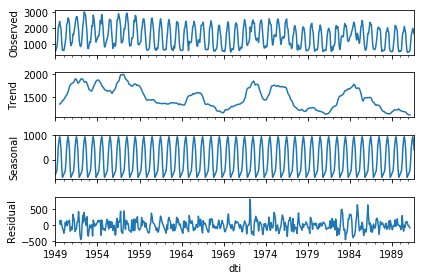

In [6]:
"""
decompse time series into (Trend,Seasonal,Residual) 
"""

import urllib.request  as urllib2 
import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm  
import seaborn as sns  
import matplotlib.pyplot as plt

# Import the sample streamflow dataset
data = urllib2.urlopen('https://raw.github.com/mps9506/Sample-Datasets/master/Streamflow/USGS-Monthly_Streamflow_Bend_OR.tsv')  
df = pd.read_csv(data, sep='\t')

# The yyyy,mm, and dd are in seperate columns, we need to make this a single column
df['dti'] = df[['year_nu','month_nu','dd_nu']].apply(lambda x: datetime.datetime(*x),axis=1)

# Let use this as our index since we are using pandas
df.index = pd.DatetimeIndex(df['dti'])  
# Clean the dataframe a bit
df = df.drop(['dd_nu','year_nu','month_nu','dti'],axis=1)  
df = df.resample('M').mean()
print(df.head())  
fig,ax = plt.subplots(1,1, figsize=(6,4))  
flow = df['mean_va']  
flow = flow['1949-01':]

res = sm.tsa.seasonal_decompose(flow)  
res.plot()  
#fig.show()  

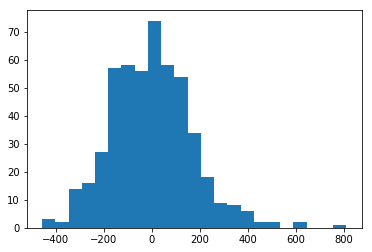

In [7]:
"""
Residual destribution
"""
x = res.resid
plt.close()
plt.hist(x[~np.isnan(x)], bins='auto')
plt.show()

In [8]:
"""
Input : ts: time series data
        alpha: Significance test level
Output: anomalies using Generelized ESD
"""

from scipy.stats import t
def Generelized_ESD(ts,alpha):
    x = ts
    anomalies_index, anomalies = [],[]
    is_anomaly = True
    k = 1
    while is_anomaly:
        n = len(x)
        #print(n)
        m = np.mean(x)
        sigma = np.std(x)
        C_k = np.max(abs(x-m)/sigma)
        anomaly_index = np.argmax(abs(x-m)/sigma) 
        p = 1 - alpha/(2.*(n-k+1))
        lamda = ((n-k)* t.ppf(p, n-k-1))/np.sqrt((n-k-1+ t.ppf(p, n-k-1))*(n-k-1))
        if C_k > lamda : 
            anomalies.append(x[anomaly_index])
            anomalies_index.append(anomaly_index)
            x = x.drop(anomaly_index)
            k += 1
        else:
            is_anomaly = False
    return anomalies_index,anomalies

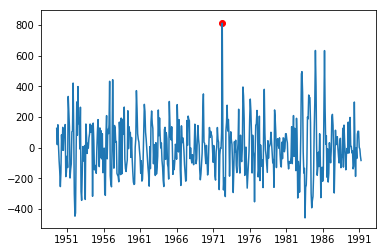

In [10]:
ts = res.resid
ts = ts[~np.isnan(ts)]
anomalies_index,anomalies = Generelized_ESD(ts,0.01)
plt.close()
plt.plot(ts)
plt.scatter(anomalies_index, anomalies, label='anomalies', c='r')
plt.show()

- $\textbf{Clustering}$ :
Un pré-procession plus avancé est nécessaire avant de commencer cette approche pour garder que les champs qui semble être les plus intéressant et qui contiennent le plus d’informations pertinente.
Il existe plusieurs techniques pour rajouter d’information pertinente dans des données de logs comme par exemple utiliser le fenêtrage sur un laps de temps. 
Plusieurs algorithme de clustering pourrait être utiliser, un des plus pertinent dans la détection des outlayers (anomalies) est DBSCAN . Cet algorithme ne nécessite pas la fixation d’un nombre de cluster. On aura ainsi des clusters de différents volumes qui se forment et des outlayer qui feront objet d’anomalies.

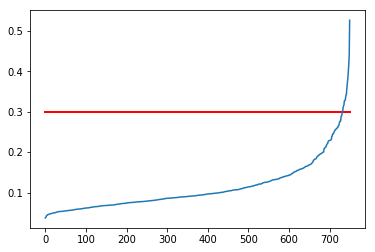

In [20]:
"""
KNN enable to select the best eps distance for DBSCAN algorithm
"""
# http://www.sersc.org/journals/IJSIP/vol6_no1/9.pdf
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
# #######################################
nbrs = NearestNeighbors(n_neighbors=10).fit(X)
distances, indices = nbrs.kneighbors(X)
last_col = np.mean(distances,axis=1)
last_col.sort(axis= 0)
horiz_line_data = np.array([0.3 for i in range(len(indices))])
plt.plot(indices, horiz_line_data, 'r--')
plt.plot(last_col)
plt.show()

Estimated number of clusters: 3


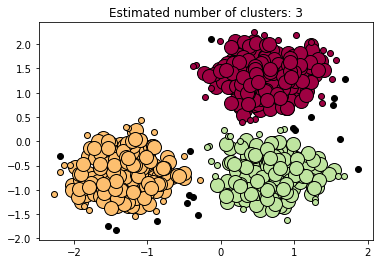

In [14]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

- $\textbf{Deep Learning}$ : 
Les réseaux de neurone ont fait leur preuve dans la détection des évènement rare (anomalie). L’auto encodeur essaie de reconstruire à partir des données les même donnée (approximativement une fonction identité). L’auto encodeur permet ainsi d’apprendre les modèles des données entré et de détecter les valeurs aberrantes dans les donnée. Il est disponible sur H2O de Spark ce qui facilite son utilisation dans un contexte big data.

In [3]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
from sklearn.datasets.samples_generator import make_blobs
import h2o
h2o.init()

data = h2o.H2OFrame.from_python(np.random.randn(100,4).tolist(), column_names=list('ABCD'))
train,test = data.split_frame(ratios=[0.7])
# Train deep autoencoder learning model on "normal"
# training data, y ignored
anomaly_model = H2OAutoEncoderEstimator(activation="Tanh",hidden=[2],sparse=True,l1=1e-4,epochs=100)
anomaly_model.train(training_frame = train)
# Compute reconstruction error with the Anomaly
# detection app (MSE between output and input layers)
recon_error = anomaly_model.anomaly(test)
# Note: Testing = Reconstructing the test dataset
test_recon = anomaly_model.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,52 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,5 months and 9 days !!!
H2O cluster name:,H2O_from_python_trimech_erxuzw
H2O cluster total nodes:,1
H2O cluster free memory:,1.570 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [5]:
recon_error.max() # reconstruction max error

0.044243785201368055